In [12]:
from google.colab import drive
drive.mount('/content/drive')
!pip install deepchem rdkit matplotlib networkx

import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from deepchem.feat import MolGraphConvFeaturizer
from deepchem.feat import CircularFingerprint
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from deepchem.feat import ConvMolFeaturizer
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
import deepchem as dc
#from methods_fingerprints import *
from drive.MyDrive.code.methods import *
from drive.MyDrive.code.methods_fingerprints import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
smiles_tr,smiles_test, logSweeter_tr, logSweeter_test, families_tr, families_test = load_data("/content/drive/MyDrive/code/SweetnersDB.xlsx")

Index(['Name', 'logSw', 'Chemical family', 'Dataset', 'Smiles'], dtype='object')


In [14]:
X_tr,X_test,scaler_X = prepare_fingerprint(smiles_tr,smiles_test)
y_tr,y_test,scaler_y = prepare_targets(logSweeter_tr,logSweeter_test)

[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerator
[14:56:32] DEPRECATION WARNING: please use MorganGenerat

In [15]:
onehot_tr,onehot_test = prepare_famille_chimique(families_tr, families_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Combiner les fingerprints et l'encodage one-hot
#representation_tr = np.hstack((X_tr, onehot_tr))
#representation_test = np.hstack((X_test,onehot_test))

# regression


In [16]:
# Créer et entraîner le modèle SVR
svr_finger = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr_finger.fit(X_tr, y_tr)

svr_famille = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr_famille.fit(onehot_tr, y_tr)


SVR(C=100)

In [6]:
score_finger = svr_finger.score(X_test, y_test)
print(f"Score R² du modèle: {score_finger:.2f}")
score_famille = svr_famille.score(onehot_test, y_test)
print(f"Score R² du modèle: {score_famille:.2f}")

Score R² du modèle: 0.55
Score R² du modèle: 0.28


In [7]:
# Faire des prédictions
y_finger_train = svr_finger.predict(X_tr)
y_finger_test = svr_finger.predict(X_test)
# Faire des prédictions
y_famille_train = svr_famille.predict(onehot_tr)
y_famille_test = svr_famille.predict(onehot_test)

In [8]:
y_pred_train =(y_finger_train + y_famille_train)/2
y_pred_test = (y_finger_test + y_famille_test)/2

In [9]:
# Inverser la normalisation pour obtenir les valeurs réelles
y_pred_train = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).ravel()
y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()
y_train = scaler_y.inverse_transform(y_tr.reshape(-1, 1)).ravel()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

In [10]:
#X = np.vstack((representation_tr,representation_test))
y = np.hstack((y_train,y_test))

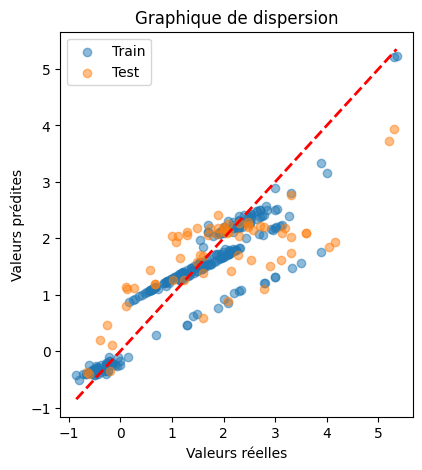

In [11]:
# Visualisation : Graphique de dispersion
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Graphique de dispersion')
plt.legend()

# scoring


In [17]:
acc_finger,conf_finger,class_finger,y_pred_finger,target_finger = scoring(y_tr,y_test,X_tr,X_test,0,'LogReg')
acc_famille,conf_famille,class_famille,y_pred_famille,target_famille = scoring(y_tr,y_test,onehot_tr,onehot_test,0,'LogReg')

Accuracy: 0.796875
Confusion Matrix:
[[16  5]
 [ 8 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71        21
           1       0.88      0.81      0.84        43

    accuracy                           0.80        64
   macro avg       0.77      0.79      0.78        64
weighted avg       0.81      0.80      0.80        64

Accuracy: 0.703125
Confusion Matrix:
[[ 6 15]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.29      0.39        21
           1       0.72      0.91      0.80        43

    accuracy                           0.70        64
   macro avg       0.66      0.60      0.60        64
weighted avg       0.68      0.70      0.67        64



In [19]:
y_pred = (y_pred_finger +y_pred_famille)/2

In [22]:
y_pred2 =[]
for i in range(len(y_pred)):
  if y_pred[i]==0.5:
    y_pred2.append(1)
  else:
    y_pred2.append(y_pred[i])

target_test = target_finger
class_report = classification_report(target_test, y_pred2)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.29      0.44        21
           1       0.74      1.00      0.85        43

    accuracy                           0.77        64
   macro avg       0.87      0.64      0.65        64
weighted avg       0.83      0.77      0.72        64



In [23]:
y_pred2 =[]
for i in range(len(y_pred)):
  if y_pred[i]==0.5:
    y_pred2.append(0)
  else:
    y_pred2.append(y_pred[i])

target_test = target_finger
class_report = classification_report(target_test, y_pred2)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.76      0.65        21
           1       0.86      0.72      0.78        43

    accuracy                           0.73        64
   macro avg       0.72      0.74      0.72        64
weighted avg       0.77      0.73      0.74        64

